# Import Libraries

In [17]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [19]:
df = pd.read_csv('Airplane_crashes_and_Fatalities.csv')
df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [20]:
df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [21]:
df.shape

(5268, 14)

In [22]:
df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Text(0, 0.5, 'Top Operators')

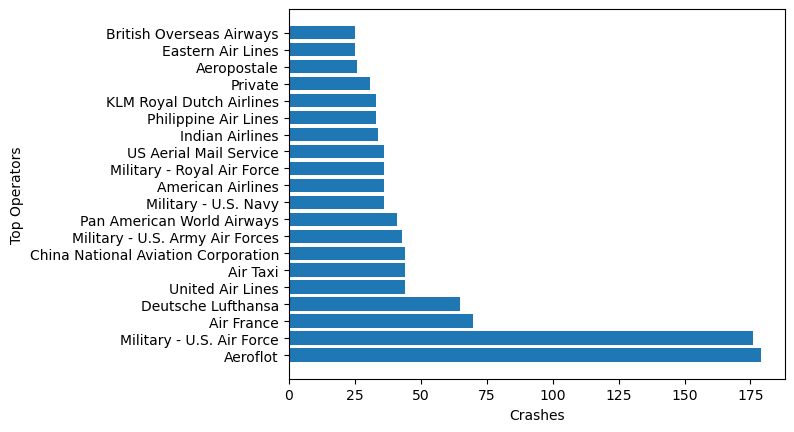

In [23]:
operator_count=df.groupby(['Operator']).count()['index']
operator_count=pd.DataFrame(operator_count).dropna(axis='rows')
operator_count=operator_count.rename(columns={'index':'count'})
operator_count=operator_count.sort_values("count",ascending=False)
op_count_x=np.array(operator_count.index)
op_count_y=np.array(operator_count['count'])


plt.barh(op_count_x[:20],op_count_y[:20])
plt.xlabel('Crashes')
plt.ylabel('Top Operators')

Text(0.5, 0, 'Fatalities')

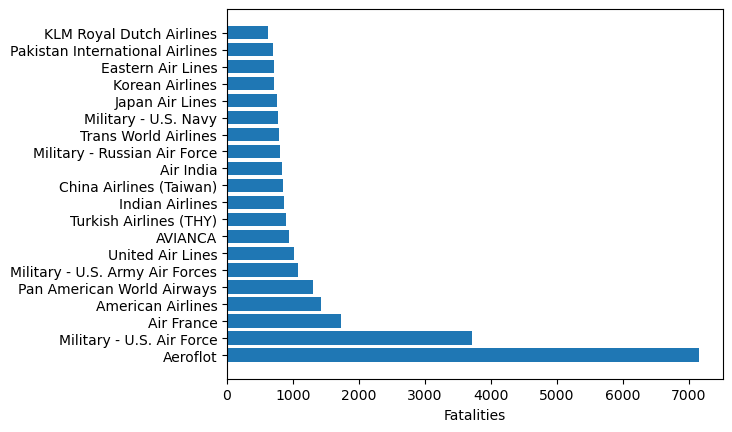

In [24]:
op_fatalities=pd.DataFrame(df.groupby(['Operator']).sum()['Fatalities'])
op_fatalities=op_fatalities.sort_values("Fatalities",ascending=False)
op_fatalities_x=op_fatalities.index
op_fatalities_y=op_fatalities['Fatalities']

plt.barh(op_fatalities_x[:20],op_fatalities_y[:20])
plt.xlabel('Fatalities')

Text(0.5, 0, 'Passengers')

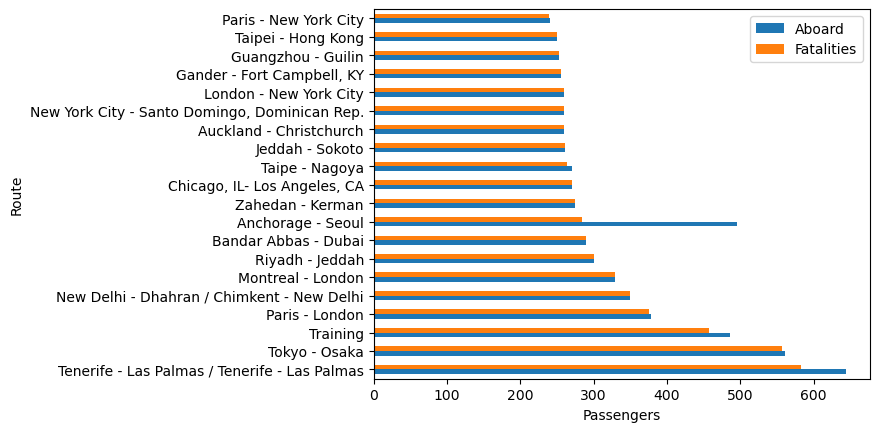

In [25]:
route_fatalities=df.groupby(['Route']).sum().drop(['index','Ground'],axis='columns')
route_fatalities=route_fatalities.sort_values('Fatalities',ascending=False)
route_fatalities[:20].plot(kind='barh')
plt.xlabel('Passengers')

In [26]:
time_df=pd.DataFrame(df.groupby(['Time']).count().sort_values('index',ascending=False)['index'])
times=np.array(time_df.index)
crash_times=[]
for i in range(len(times)):
    if(times[0]=='c'):
        times[i]=times[i][3:5]
    else:
        times[i]=times[i][:2]
        crash_times.append(times[i][:2])


Text(0.5, 0, 'Crashes')

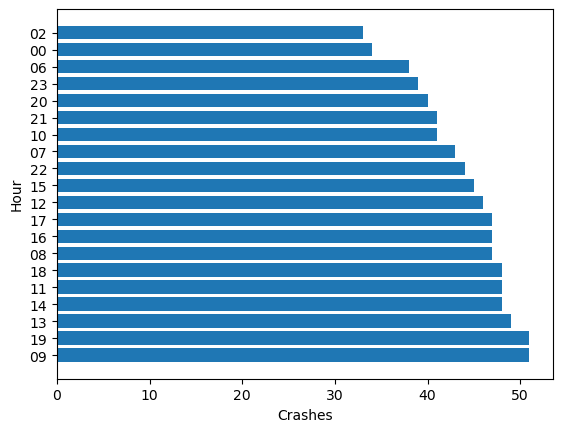

In [27]:
times=pd.DataFrame({'Hour':crash_times,'count':np.ones(len(crash_times))})
total_by_hour=times.groupby('Hour').count().sort_values('count',ascending=False)
plt.barh(total_by_hour[:20].index,total_by_hour[:20]['count'])
plt.ylabel('Hour')
plt.xlabel('Crashes')


Text(0, 0.5, 'Crashes')

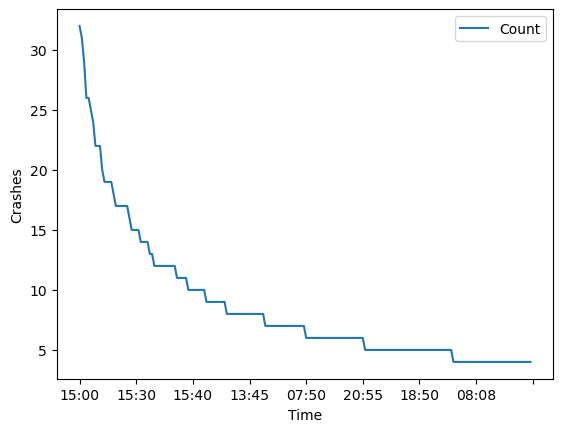

In [28]:
time_df=pd.DataFrame(df.groupby(['Time']).count().sort_values('index',ascending=False)['index'])
time_df.rename({'index':'Count'},axis='columns',inplace=True)
time_df[:200].plot()
plt.ylabel('Crashes')


Text(0.5, 0, 'Fatalities')

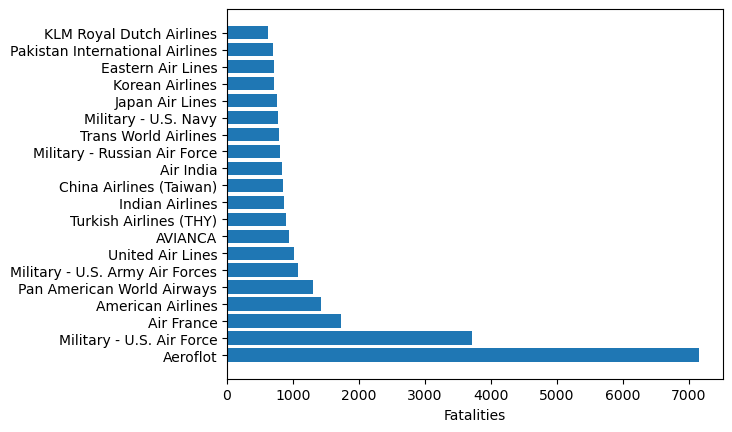

In [29]:
op_fatalities=pd.DataFrame(df.groupby(['Operator']).sum()['Fatalities'])
op_fatalities=op_fatalities.sort_values("Fatalities",ascending=False)
op_fatalities_x=op_fatalities.index
op_fatalities_y=op_fatalities['Fatalities']

plt.barh(op_fatalities_x[:20],op_fatalities_y[:20])
plt.xlabel('Fatalities')
